# FEATURE SELECTION

### Methods
* Variance Threshold
* Chi-Squared (Chi2)
* ANOVA F-Value
* Correlation Matrix

### Sources
* [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)
* [Feature Selection Methods with Code Examples](https://medium.com/analytics-vidhya/feature-selection-methods-with-code-examples-a78439477cd4)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset: Mobile Price Classification

Business plot:
* Problem: predict price range for mobile phones based o device features
* Source: [Kaggle Mobile Price Classification Dataset](https://www.kaggle.com/iabhishekofficial/mobile-price-classification)

In [4]:
data = pd.read_csv("mobile-price-train.csv")

In [5]:
X = data.iloc[:,0:20] # features
y = data.iloc[:,-1]   # target

len(X.columns)

20

### Variance Threshold (filter)

In [23]:
from sklearn.feature_selection import VarianceThreshold

In [77]:
selector = VarianceThreshold(99999)
fit = selector.fit_transform(X)
cols = selector.get_support(indices=True)
selected_data = data.iloc[:,cols]
selected_data.columns

Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')

### Chi-Squared Method (filter)

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [78]:
selector = SelectKBest(score_func=chi2, k=5)
fit = selector.fit(X,y)
cols = selector.get_support(indices=True)
selected_data = data.iloc[:,cols]
selected_data.columns

Index(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], dtype='object')

In [79]:
dfFeatures = pd.DataFrame(X.columns)
dfScores = pd.DataFrame(fit.scores_)
featureScores = pd.concat([dfFeatures,dfScores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(5,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863


### ANOVA F-Value (filter)

In [81]:
from sklearn.feature_selection import f_classif

In [83]:
selector = SelectKBest(f_classif, k=5)
fit = selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
selected_data = data.iloc[:,cols]
selected_data.columns

Index(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], dtype='object')

### Correlation Matrix with Heatmap (filter)

In [6]:
corrmat = data.corr()
corr_features = corrmat.index

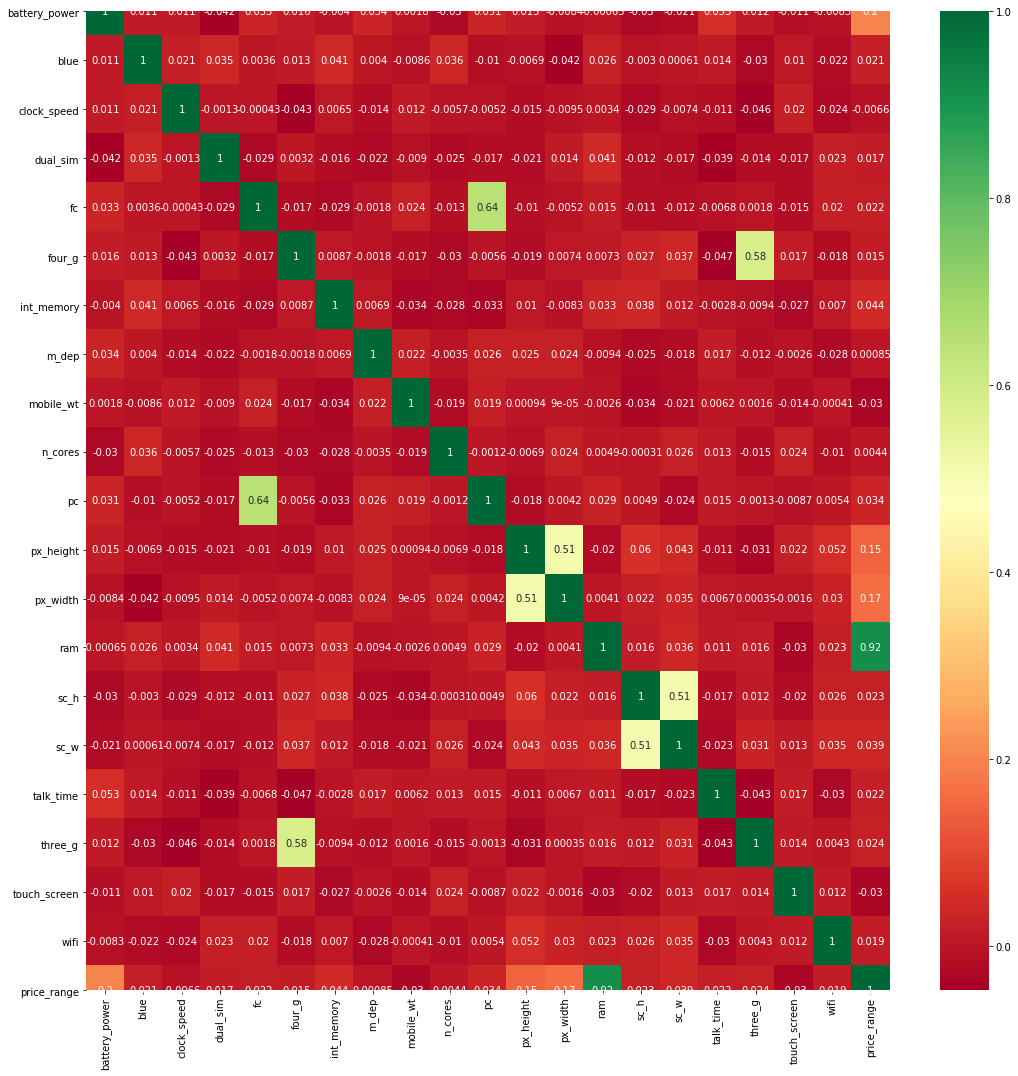

In [7]:
plt.figure(figsize=(18,18))
g=sns.heatmap(data[corr_features].corr(),annot=True,cmap="RdYlGn")